In [1]:
# importing required libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load datasets with datetime parsing
train_df = pd.read_csv("train.csv", parse_dates=["DateTime"])
test_df = pd.read_csv("test.csv", parse_dates=["DateTime"])

In [9]:
# Preview the datasets
print("Train Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())

# Check structure
print("\nTrain Info:")
train_df.info()

print("\nTest Info:")
test_df.info()


Train Data:
             DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         1        15  20151101001
1 2015-11-01 01:00:00         1        13  20151101011
2 2015-11-01 02:00:00         1        10  20151101021
3 2015-11-01 03:00:00         1         7  20151101031
4 2015-11-01 04:00:00         1         9  20151101041

Test Data:
             DateTime  Junction           ID
0 2017-07-01 00:00:00         1  20170701001
1 2017-07-01 01:00:00         1  20170701011
2 2017-07-01 02:00:00         1  20170701021
3 2017-07-01 03:00:00         1  20170701031
4 2017-07-01 04:00:00         1  20170701041

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-

In [11]:
# Null values
print("Missing values in training data:\n", train_df.isnull().sum())
print("Missing values in testing data:\n", test_df.isnull().sum())

# Duplicates
print("Duplicate rows in training data:", train_df.duplicated().sum())
print("Duplicate rows in testing data:", test_df.duplicated().sum())

Missing values in training data:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
Missing values in testing data:
 DateTime    0
Junction    0
ID          0
dtype: int64
Duplicate rows in training data: 0
Duplicate rows in testing data: 0


In [13]:
# Summary stats
print(train_df.describe())

                            DateTime      Junction      Vehicles            ID
count                          48120  48120.000000  48120.000000  4.812000e+04
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334  2.016330e+10
min              2015-11-01 00:00:00      1.000000      1.000000  2.015110e+10
25%              2016-04-16 01:45:00      1.000000      9.000000  2.016042e+10
50%              2016-09-30 03:30:00      2.000000     15.000000  2.016093e+10
75%              2017-02-25 16:00:00      3.000000     29.000000  2.017023e+10
max              2017-06-30 23:00:00      4.000000    180.000000  2.017063e+10
std                              NaN      0.966955     20.750063  5.944854e+06


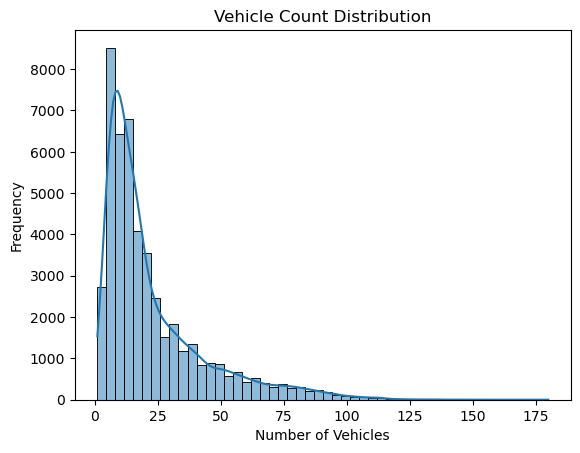

In [17]:
# Vehicle count distribution
sns.histplot(train_df['Vehicles'], bins=50, kde=True)
plt.title("Vehicle Count Distribution")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()

In [23]:
 # Time-Based Feature Extraction
train_df["hour"] = train_df["DateTime"].dt.hour
train_df["day"] = train_df["DateTime"].dt.day
train_df["month"] = train_df["DateTime"].dt.month
train_df["weekday"] = train_df["DateTime"].dt.weekday  # 0 = Monday, 6 = Sunday
train_df["is_weekend"] = train_df["weekday"].isin([5, 6]).astype(int)

In [45]:
 # Visualize Vehicle Counts


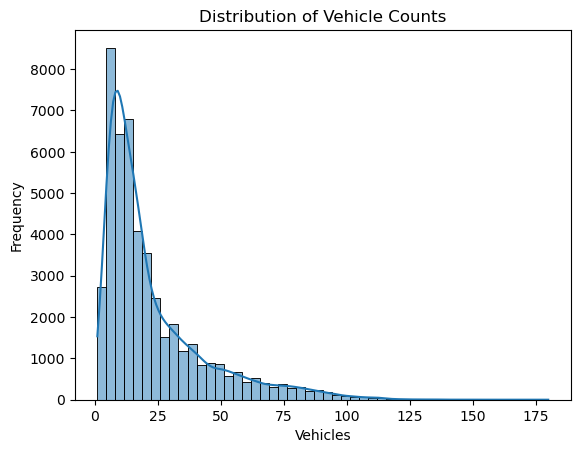

In [27]:
# A. Vehicle count distribution
sns.histplot(train_df["Vehicles"], bins=50, kde=True)
plt.title("Distribution of Vehicle Counts")
plt.xlabel("Vehicles")
plt.ylabel("Frequency")
plt.show()

C:\Users\ratho\AppData\Local\Temp\ipykernel_4284\1749691053.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_df, x="hour", y="Vehicles", estimator="mean", ci=None)


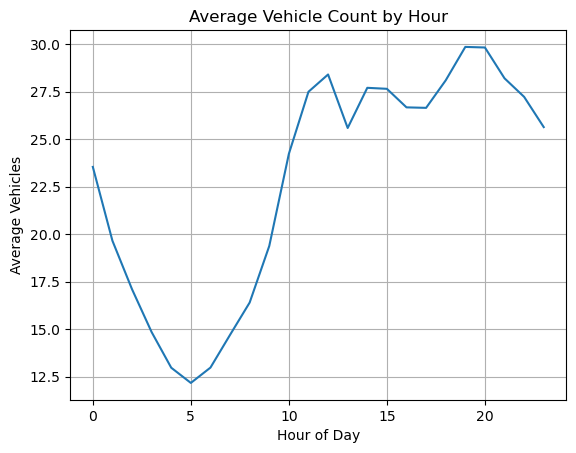

In [29]:
# b) Average Vehicles by Hour of Day
sns.lineplot(data=train_df, x="hour", y="Vehicles", estimator="mean", ci=None)
plt.title("Average Vehicle Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Vehicles")
plt.grid(True)
plt.show()

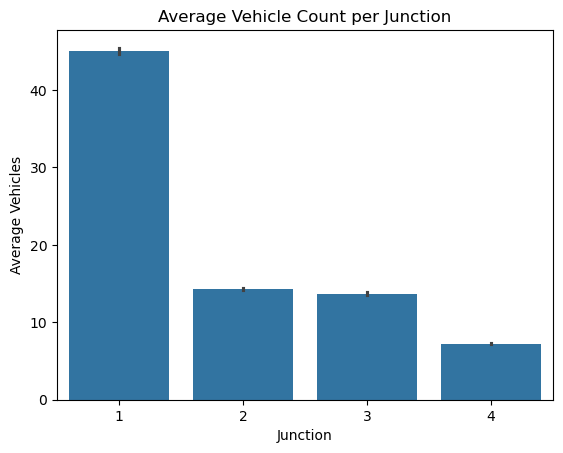

In [31]:
# c) Average Vehicles by Junction
sns.barplot(data=train_df, x="Junction", y="Vehicles", estimator="mean")
plt.title("Average Vehicle Count per Junction")
plt.xlabel("Junction")
plt.ylabel("Average Vehicles")
plt.show()

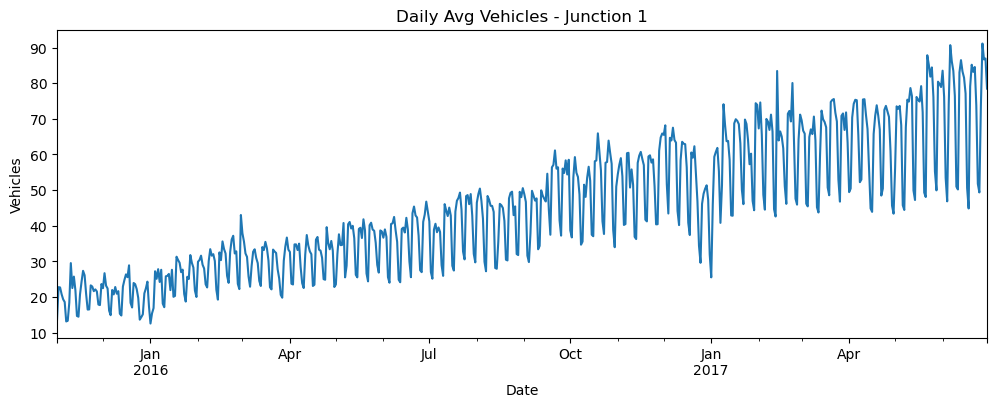

In [41]:
# d) Trend Over Time (Preview)
sample = train_df[train_df["Junction"] == 1].copy()
sample.set_index("DateTime", inplace=True)
sample["Vehicles"].resample("D").mean().plot(figsize=(12, 4), title="Daily Avg Vehicles - Junction 1")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.show()